
# Human Activity classifier. 

GOAL : Accurately classify the activity performed by the individual based on the dataset. 


The dataset was created by SmartLab- Non-Linear Complex Systems Laboratory
DITEN - University  degli Studi di Genova, Genoa (I-16145), Italy.

All the data features have been normalized to be in between $[-1,1]$.


## Models used. 
* Random forest
* Support Vector Machines







# Taking a look at the dataset and exploration.

In [115]:
# Loading the required libraries!
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
# Loading the data set. 
df_train = pd.read_csv("drive/MyDrive/UCI_HAR_Dataset/train/X_train.txt",sep="\s+",header=None,)
y_train = pd.read_csv("drive/MyDrive/UCI_HAR_Dataset/train/y_train.txt",sep="\s+",header=None,)
df_test = pd.read_csv("drive/MyDrive/UCI_HAR_Dataset/test/X_test.txt",sep="\s+",header=None,)
y_test = pd.read_csv("drive/MyDrive/UCI_HAR_Dataset/test/y_test.txt",sep="\s+",header=None,)


In [118]:
# Labeling the data frame 
feature_labels = pd.read_csv("drive/MyDrive/UCI_HAR_Dataset/features.txt",sep=" ",header=None,index_col=None) 
labels = feature_labels[1].values.tolist()
df_train.columns = labels
df_test.columns = labels
y_train.columns = ["output"]
activity_labels = ['Walking','Walking upstairs','Waling downstairs','Sitting', 'Standing', 'Laying']

# Shuffling the data set. 
df_train,y_train = shuffle(df_train,y_train)


In [119]:
# dimensions  of training  dataset
print(" Dimensions of training data set:", df_train.shape)
print(" Dimensions of testing data set:", df_test.shape)

 Dimensions of training data set: (7352, 561)
 Dimensions of testing data set: (2947, 561)


## Activity instances. 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Value counts')

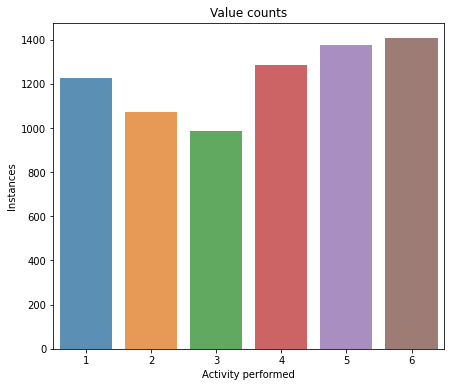

In [120]:
ind = y_train['output'].value_counts().index

plt.figure(figsize=(7,6))
sns.barplot(ind, y_train['output'].value_counts(), alpha = 0.8)
plt.xlabel('Activity performed')
plt.ylabel('Instances')
plt.title('Value counts')

In [121]:
#y_train['output'].value_counts().plot(kind = 'bar', figsize =(7,6), edgecolor= 'red')
#plt.xlabel('Activity performed')
#plt.ylabel('Instances')
#plt.title('Value counts') 
#plt.legend(['blue','green','yellow','black','red','orange'])

### Correlation between features.

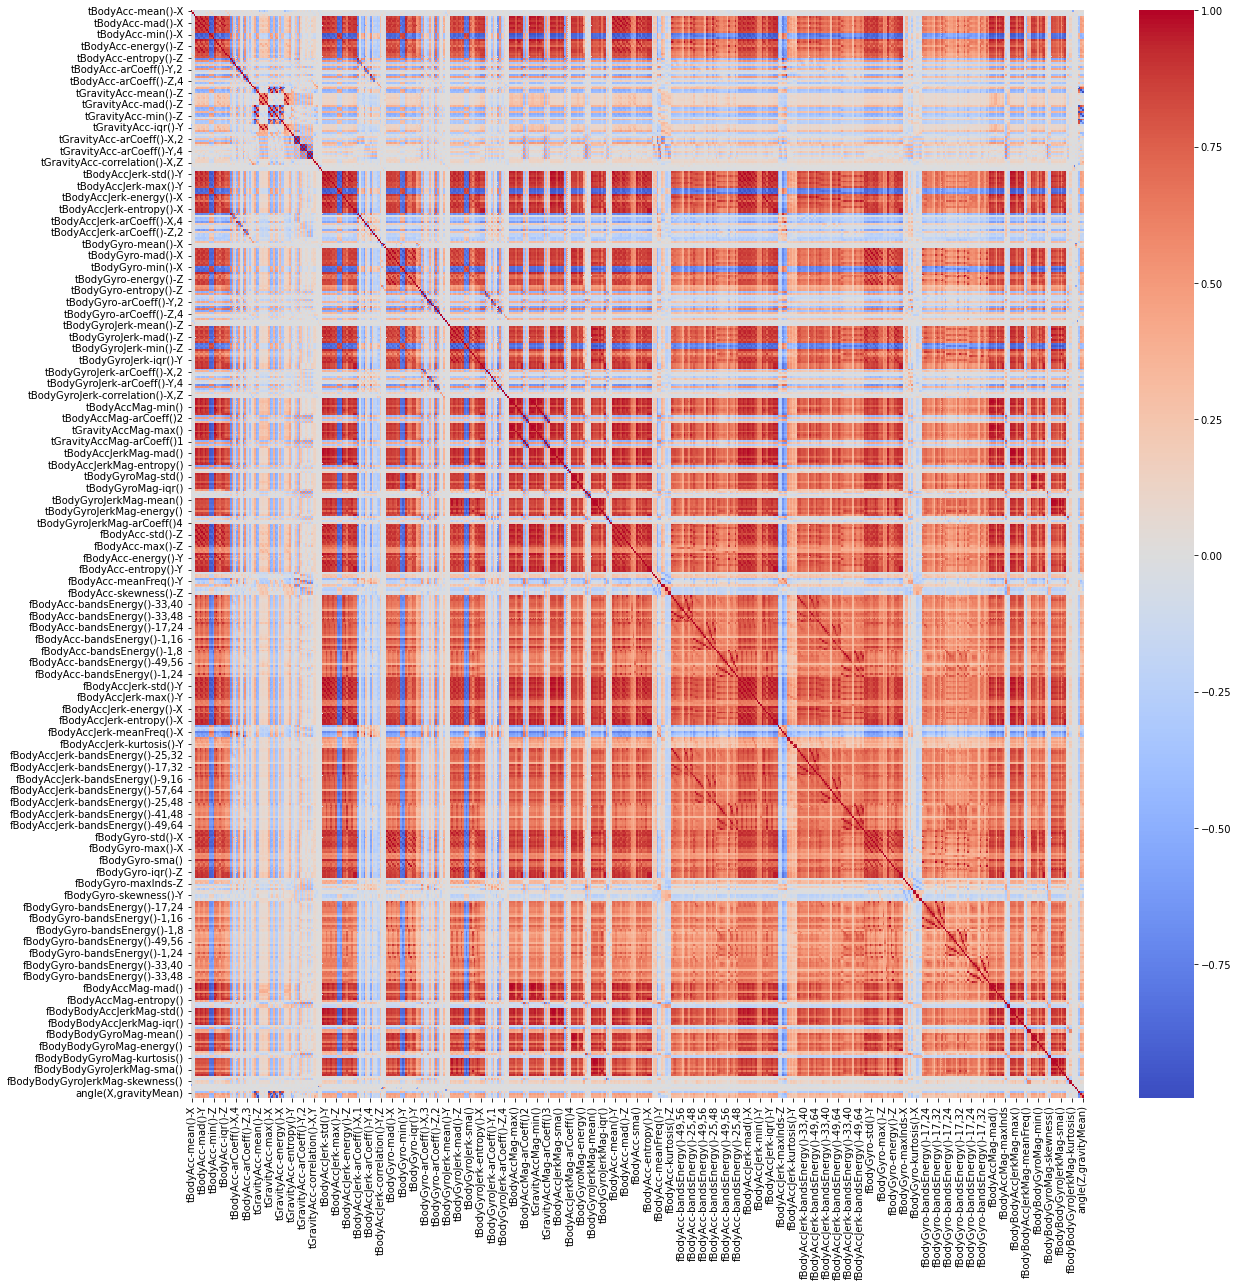

In [122]:
correlation = df_train.corr()
plt.figure(figsize= (20,20))
sns.heatmap(correlation, cmap = 'coolwarm')
plt.show()

# Random Forest classifier

In [123]:
forest1 = RandomForestClassifier(n_estimators=150, random_state=33, bootstrap = True)
forest1.fit(df_train, y_train.values.ravel())


forest2 = RandomForestClassifier(n_estimators=50, random_state=5, bootstrap = True, max_depth = 10, max_samples = 900)
forest2.fit(df_train, y_train.values.ravel())


RandomForestClassifier(max_depth=10, max_samples=900, n_estimators=50,
                       random_state=5)

## Model evaluations. 
We check accuracy scores, cross validation scores and some output visualization

### Accuracy scores

In [124]:
train_pred1 = forest1.predict(df_train)
y_pred1 = forest1.predict(df_test)

train_pred2 = forest2.predict(df_train)
y_pred2 = forest2.predict(df_test)

print('Accuracy score TRAIN(forest1): ', format(accuracy_score(y_train, train_pred1)))
print('Accuracy score TEST(forest1): ', format(accuracy_score(y_test, y_pred1)))

print('Accuracy score TRAIN(forest2): ', format(accuracy_score(y_train, train_pred2)))
print('Accuracy score TEST(forest2): ', format(accuracy_score(y_test, y_pred2)))

Accuracy score TRAIN(forest1):  1.0
Accuracy score TEST(forest1):  0.9267051238547676
Accuracy score TRAIN(forest2):  0.9761969532100109
Accuracy score TEST(forest2):  0.9144893111638955


### Confusion matrix. 



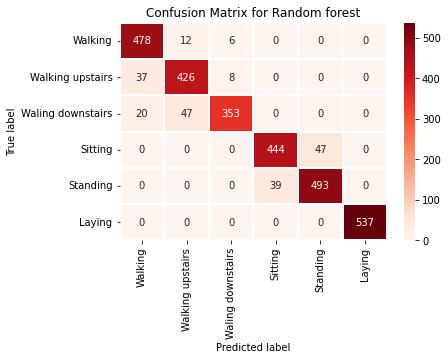

In [125]:
forest1_confusion = confusion_matrix(y_test,y_pred1)
ax = sns.heatmap(forest1_confusion, cmap = 'Reds', annot = True,
                 xticklabels = activity_labels,
                 yticklabels = activity_labels,
                 fmt = '.0f',
                 linecolor= 'white', 
                 linewidths=1)
ax.set_title('Confusion Matrix for Random forest')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

### Cross validation



In [126]:
forest1_score = cross_val_score(forest1, df_train, y_train.values.ravel(), cv=5)
forest2_score = cross_val_score(forest2, df_train, y_train.values.ravel(), cv=5)

In [127]:
# Accuracy scores
print("  Forest1 scores: %0.5f accuracy with a standard deviation of %0.5f" % (forest1_score.mean(), forest1_score.std()))
print("  Forest2 scores: %0.5f accuracy with a standard deviation of %0.5f" % (forest2_score.mean(), forest2_score.std()))

  Forest1 scores: 0.98028 accuracy with a standard deviation of 0.00247
  Forest2 scores: 0.95824 accuracy with a standard deviation of 0.00393


# Support vector machine classifier. 

In [128]:
linear = SVC(kernel = 'linear', C = 1, decision_function_shape = 'ovr',random_state = 54)
linear.fit(df_train ,y_train.values.ravel())

poly = SVC(kernel = 'poly', C = 1, decision_function_shape = 'ovr',random_state = 10, degree = 3)
poly.fit(df_train ,y_train.values.ravel())

SVC(C=1, kernel='poly', random_state=10)

## Model evaluations. 

### Accuracy scores!



In [129]:
train_pred_lin = linear.predict(df_train)
y_pred_lin = linear.predict(df_test)

train_pred_poly = poly.predict(df_train)
y_pred_poly = poly.predict(df_test)


print('Accuracy score TRAIN(linear): ', format(accuracy_score(y_train, train_pred_lin)))
print('Accuracy score TEST(linear): ', format(accuracy_score(y_test, y_pred_lin)))

print('Accuracy score TRAIN(Poly): ', format(accuracy_score(y_train, train_pred_poly)))
print('Accuracy score TEST(Poly): ', format(accuracy_score(y_test, y_pred_poly)))

Accuracy score TRAIN(linear):  0.9938792165397171
Accuracy score TEST(linear):  0.9640312181879878
Accuracy score TRAIN(Poly):  0.9907508161044614
Accuracy score TEST(Poly):  0.9579233118425518


### Confusion Matrix


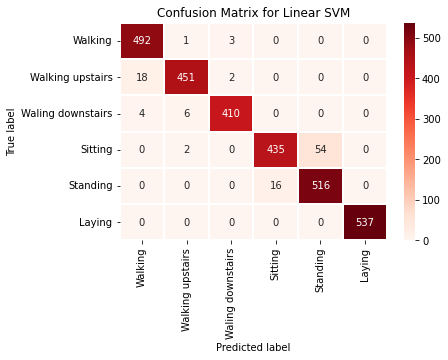

In [130]:
linear_confusion = confusion_matrix(y_test,y_pred_lin)
ax = sns.heatmap(linear_confusion, cmap = 'Reds', annot = True,
                 xticklabels = activity_labels,
                 yticklabels = activity_labels,
                 fmt = '.0f',
                 linecolor= 'white', 
                 linewidths=1)
ax.set_title('Confusion Matrix for Linear SVM')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

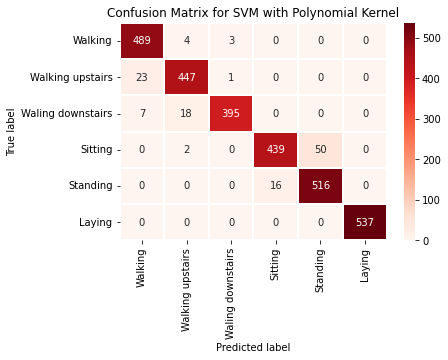

In [131]:
poly_confusion = confusion_matrix(y_test,y_pred_poly)
ax = sns.heatmap(poly_confusion, cmap = 'Reds', annot = True,
                 xticklabels = activity_labels,
                 yticklabels = activity_labels,
                 fmt = '.0f',
                 linecolor= 'white', 
                 linewidths=1)
ax.set_title('Confusion Matrix for SVM with Polynomial Kernel')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

### Cross validation scores

In [132]:
linear_score = cross_val_score(linear, df_train, y_train.values.ravel(), cv=5)
poly_score = cross_val_score(poly, df_train, y_train.values.ravel(), cv=5)

In [133]:
print("  Linear SVM scores: %0.5f accuracy with a standard deviation of %0.5f" % (linear_score.mean(), linear_score.std()))
print("  Poly SVM scores: %0.2f accuracy with a standard deviation of %0.2f" % (poly_score.mean(), poly_score.std()))

  Linear SVM scores: 0.98694 accuracy with a standard deviation of 0.00169
  Poly SVM scores: 0.99 accuracy with a standard deviation of 0.00


# Feature Selections.

Feature selection was done based on Random forest model and also based on variances. 

## Feature selection based on Random forest. 

In [134]:
# Feature selection! using sklearn
# *** Understand how the important features are selected from the Random forest model. ***

forest_features = SelectFromModel(forest1, prefit=True)
imp_features = forest_features.get_support()

new_train = df_train.iloc[:,imp_features]
new_test = df_test.iloc[:,imp_features]
new_train.shape


(7352, 130)

In [135]:
# Selected features
print(df_train.columns[imp_features])

Index(['tBodyAcc-std()-X', 'tBodyAcc-mad()-X', 'tBodyAcc-max()-X',
       'tBodyAcc-energy()-X', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       ...
       'fBodyGyro-bandsEnergy()-1,24', 'fBodyAccMag-mean()',
       'fBodyAccMag-std()', 'fBodyAccMag-mad()', 'fBodyAccMag-sma()',
       'fBodyAccMag-energy()', 'fBodyBodyAccJerkMag-iqr()',
       'angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=130)


In [136]:
new_train = df_train.iloc[:,imp_features]
new_test = df_test.iloc[:,imp_features]
new_train.shape

(7352, 130)

##Models on selected features.

### Random Forest

In [137]:
new_forest = RandomForestClassifier(n_estimators=100, random_state=27, bootstrap = True)
new_forest.fit(new_train, y_train.values.ravel())

RandomForestClassifier(random_state=27)

In [138]:
train_pred1 = new_forest.predict(new_train)
y_pred1 = new_forest.predict(new_test)

print('Accuracy score TRAIN(New_forest): ', format(accuracy_score(y_train, train_pred1)))
print('Accuracy score TEST(new_forest): ', format(accuracy_score(y_test, y_pred1)))

Accuracy score TRAIN(New_forest):  1.0
Accuracy score TEST(new_forest):  0.9131319986426875


In [139]:
newforest_score = cross_val_score(new_forest, new_train, y_train.values.ravel(), cv=5)
print("  New Forest scores: %0.5f accuracy with a standard deviation of %0.5f" % (newforest_score.mean(), newforest_score.std()))

  New Forest scores: 0.98164 accuracy with a standard deviation of 0.00475


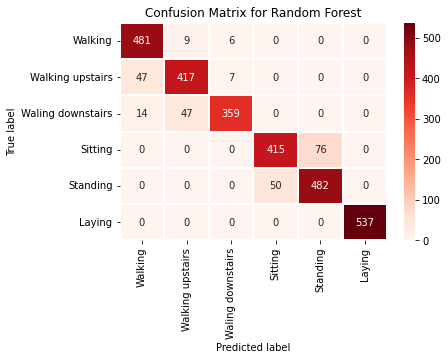

In [140]:
newforest_confusion = confusion_matrix(y_test,y_pred1)
ax = sns.heatmap(newforest_confusion, cmap = 'Reds', annot = True,
                 xticklabels = activity_labels,
                 yticklabels = activity_labels,
                 fmt = '.0f',
                 linecolor= 'white', 
                 linewidths=1)
ax.set_title('Confusion Matrix for Random Forest')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

### SVM

In [141]:
new_svm = SVC(kernel = 'linear', C = 1, decision_function_shape = 'ovr',random_state = 24)
new_svm.fit(new_train ,y_train.values.ravel())

SVC(C=1, kernel='linear', random_state=24)

In [142]:
train_pred2 = new_svm.predict(new_train)
y_pred2 = new_svm.predict(new_test)

print('Accuracy score TRAIN(SVM): ', format(accuracy_score(y_train, train_pred2)))
print('Accuracy score TEST(SVM): ', format(accuracy_score(y_test, y_pred2)))

Accuracy score TRAIN(SVM):  0.9725244831338411
Accuracy score TEST(SVM):  0.9260264675941635


In [143]:
newsvm_score = cross_val_score(new_svm, new_train, y_train.values.ravel(), cv=5)
print("  New Forest scores: %0.5f accuracy with a standard deviation of %0.5f" % (newsvm_score.mean(), newsvm_score.std()))

  New Forest scores: 0.96749 accuracy with a standard deviation of 0.00318


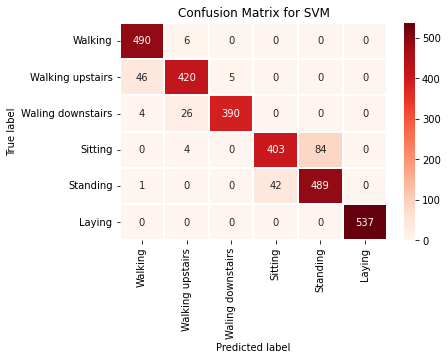

In [144]:
newsvm_confusion = confusion_matrix(y_test,y_pred2)
ax = sns.heatmap(newsvm_confusion, cmap = 'Reds', annot = True,
                 xticklabels = activity_labels,
                 yticklabels = activity_labels,
                 fmt = '.0f',
                 linecolor= 'white', 
                 linewidths=1)
ax.set_title('Confusion Matrix for SVM')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

## Feature selection based on variance theshold

In [145]:
vt = VarianceThreshold(threshold = 0.05)
sel = vt.fit(df_train)
var_features = sel.get_support()
var_train = df_train.iloc[:,var_features]
var_train.shape
var_test = df_test.iloc[:,var_features]
var_test.shape

(2947, 369)

### Models

#### Random Forest

In [146]:
var_forest = RandomForestClassifier(n_estimators=100, random_state=27, bootstrap = True)
var_forest.fit(var_train, y_train.values.ravel())

RandomForestClassifier(random_state=27)

In [147]:
train_predvar = var_forest.predict(var_train)
y_predvar = var_forest.predict(var_test)

print('Accuracy score TRAIN(var_forest): ', format(accuracy_score(y_train, train_predvar)))
print('Accuracy score TEST(var_forest): ', format(accuracy_score(y_test, y_predvar)))

Accuracy score TRAIN(var_forest):  1.0
Accuracy score TEST(var_forest):  0.9212758737699356


In [148]:
varforest_score = cross_val_score(var_forest, var_train, y_train.values.ravel(), cv=5)
print("  Random Forest scores: %0.5f accuracy with a standard deviation of %0.5f" % (newforest_score.mean(), newforest_score.std()))

  Random Forest scores: 0.98164 accuracy with a standard deviation of 0.00475


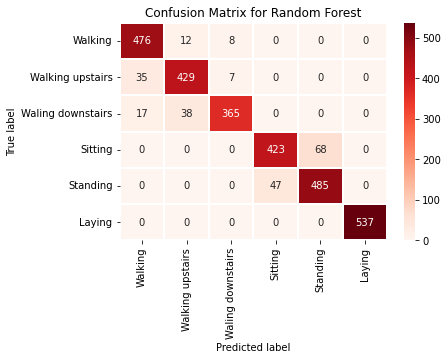

In [149]:
varforest_confusion = confusion_matrix(y_test,y_predvar)
ax = sns.heatmap(varforest_confusion, cmap = 'Reds', annot = True,
                 xticklabels = activity_labels,
                 yticklabels = activity_labels,
                 fmt = '.0f',
                 linecolor= 'white', 
                 linewidths=1)
ax.set_title('Confusion Matrix for Random Forest')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

####SVM

In [152]:
var_svm = SVC(kernel = 'linear', C = 1, decision_function_shape = 'ovr',random_state = 24)
var_svm.fit(var_train ,y_train.values.ravel())

SVC(C=1, kernel='linear', random_state=24)

In [153]:
train_predvar = var_svm.predict(var_train)
y_predvar = var_svm.predict(var_test)

print('Accuracy score TRAIN(var_svm): ', format(accuracy_score(y_train, train_predvar)))
print('Accuracy score TEST(var_svm): ', format(accuracy_score(y_test, y_predvar)))

Accuracy score TRAIN(var_svm):  0.9933351468988031
Accuracy score TEST(var_svm):  0.9636918900576857


In [154]:
varsvm_score = cross_val_score(var_svm, var_train, y_train.values.ravel(), cv=5)
print("  New Forest scores: %0.5f accuracy with a standard deviation of %0.5f" % (newsvm_score.mean(), newsvm_score.std()))

  New Forest scores: 0.96749 accuracy with a standard deviation of 0.00318


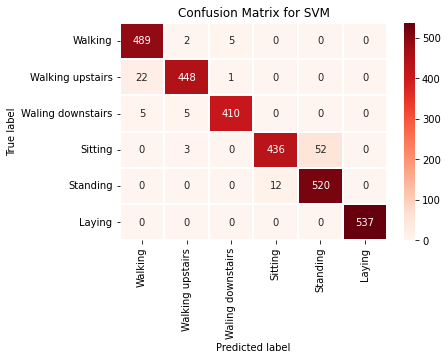

In [155]:
varsvm_confusion = confusion_matrix(y_test,y_predvar)
ax = sns.heatmap(varsvm_confusion, cmap = 'Reds', annot = True,
                 xticklabels = activity_labels,
                 yticklabels = activity_labels,
                 fmt = '.0f',
                 linecolor= 'white', 
                 linewidths=1)
ax.set_title('Confusion Matrix for SVM')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

# Result. 


Model  | Acc. with full features | Acc. with model sel. features| Acc. with var_features
-------------------|------------------|--------------|-------
Random Forest     |  92.3%|91.3% |92.1% |
SVM      | 96.4 %| 92.6%|  96.4%|

Linear Support vector machine worked best with the Classifier data. 